# Problem Set 6

### Ruby Han

In [6]:
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn import tree
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# read in data
biden = pd.read_csv('C:/Users/hanji/Dropbox/fall 2021/Python/class download/CompEcon_Fall21/MachineLearning/biden.csv')

In [3]:
# inspect data
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


## Task 1

In [7]:
# split the data

# define the predictors
predictors = biden[['female', 'age', 'educ', 'dem', 'rep']]
y = biden['biden']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    predictors,  #X's
    y, test_size = 0.3, random_state = 25)

In [8]:
# fit on the training data
dtr1 = tree.DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
f_tr1 = dtr1.fit(X_train, y_train)

In [10]:
# plot the tree, interpret the results
# a text version
plot1 = export_text(f_tr1, feature_names = ['female', 'age', 'educ', 'dem', 'rep'])
print(plot1)

|--- dem <= 0.50
|   |--- rep <= 0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [56.49]
|   |   |--- female >  0.50
|   |   |   |--- value: [61.27]
|   |--- rep >  0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [38.33]
|   |   |--- female >  0.50
|   |   |   |--- value: [44.89]
|--- dem >  0.50
|   |--- age <= 54.50
|   |   |--- educ <= 15.50
|   |   |   |--- value: [71.11]
|   |   |--- educ >  15.50
|   |   |   |--- value: [76.59]
|   |--- age >  54.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [75.19]
|   |   |--- female >  0.50
|   |   |   |--- value: [80.29]



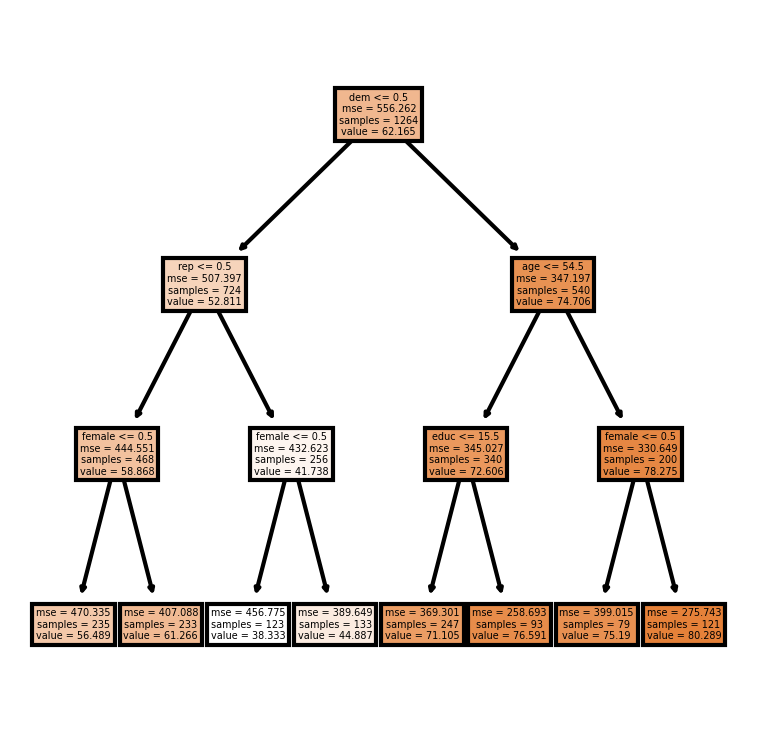

In [11]:
# a real plot
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(f_tr1,
           feature_names = ['female', 'age', 'educ', 'dem', 'rep'], 
           filled = True);

### A person's feeling thermometer for Biden is predicted by her political party, gender, whether she is younger than 55 years old, and whether she has completed at least some college level education. Based on these critera, 8 leaves are created, and the mean value of each leaf represents the predicted value for a person who belongs to this leaf. In general, a person who is a Democrat, older than 55 years old, and a female is likely to have the highest affinity towards Biden; a person who is a male Republican is likely to have the lowest affinity towards Biden. The thermometer can range from 38 to 80 across leafs, mainly depending on whether a person is a Democrat, Republican, or neither. Being a Democrat makes the score higher than 70, no matter other conditions. Being a Repulican makes the score less than 45 regardless. Minority party members stand in the middle.

In [12]:
# test MSE
t_MSE = mean_squared_error(y_test, f_tr1.predict(X_test))
print('The SSE of the above tree on the test set is', t_MSE)

The SSE of the above tree on the test set is 396.1937146321307


## Task 2 - tune the tree

In [13]:
# optimally tune

from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, 10],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20)}

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# run 500 models in total; n_jobs = -1 means to use all processors in parallel

ot = RandomizedSearchCV(dtr1, param_dist, n_iter = 100, n_jobs = -1, cv = 5, 
                        random_state = 25, scoring='neg_mean_squared_error')

In [24]:
# report optimal tuning parameter values
f_ot = ot.fit(predictors, y)
f_ot.best_params_

{'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}

In [27]:
# report MSE of optimal results
f_ot.best_score_

-401.713307249986

## Task 3 - tune a random forrest model

In [17]:
from sklearn.ensemble import RandomForestRegressor

# following the same methodology, I firstly define the parameters' distribution to search over
param_dist_rf = {"n_estimators": [10 , 200], 
                 "max_depth": [3 , 10], 
                 "min_samples_split": sp_randint (2 , 20 ) ,
                 "min_samples_leaf": sp_randint (2 , 20 ) ,
                 "max_features": sp_randint (1 , 5)}

In [18]:
rf_ot = RandomizedSearchCV(RandomForestRegressor(), param_dist_rf, n_iter = 100, n_jobs = -1, cv = 5,
                          random_state = 25, scoring = 'neg_mean_squared_error')

In [22]:
# report optimal tuning parameters
f_rf_ot = rf_ot.fit(predictors, y)
f_rf_ot.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 200}

In [23]:
# report MSE of optimal results
f_rf_ot.best_score_

-397.13432763376466